<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/3dSchr%C3%B6dinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install numpy plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The code starts by importing the necessary libraries. NumPy is used for numerical calculations, Plotly is used for generating 3D plots, SciPy is used for calculating special functions, and the math library is used for square root and factorial functions.

In [19]:
import numpy as np                      # Import the NumPy library for numerical calculations
import plotly.graph_objs as go          # Import Plotly for generating 3D plots
from plotly.subplots import make_subplots
from scipy.special import sph_harm, genlaguerre    # Import SciPy for calculating special functions
from math import sqrt, factorial        # Import math functions for square root and factorial

The code defines a function hydrogen_wf that takes as input the quantum numbers n, l, and m, as well as the spatial coordinates r, theta, and phi. The function calculates the reduced radial distance rho, the spherical harmonic function s_harm, the generalized Laguerre polynomial l_poly, and the overall wavefunction wf. The function returns the absolute square of the wavefunction.

In [20]:
def hydrogen_wf(n, l, m, r, theta, phi):
    # Calculate the reduced radial distance rho
    rho = 2 * r / n
    
    # Calculate the spherical harmonic function
    s_harm = sph_harm(m, l, phi, theta)
    
    # Calculate the generalized Laguerre polynomial
    l_poly = genlaguerre(n - l - 1, 2 * l + 1)(rho)
    
    # Calculate the overall wavefunction using appropriate coefficients
    coeff = sqrt((2 / n)**3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    wf = coeff * np.exp(-rho / 2) * rho**l * s_harm * l_poly
    
    # Return the absolute square of the wavefunction
    return np.abs(wf)**2


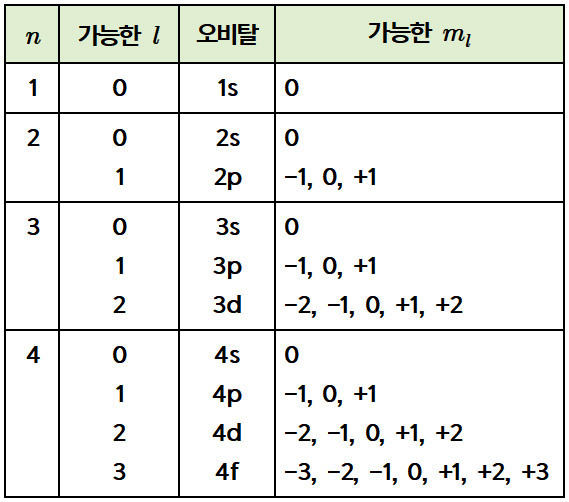

The code defines a function hydrogen_wf that takes as input the quantum numbers n, l, and m, as well as the spatial coordinates r, theta, and phi. The function calculates the reduced radial distance rho, the spherical harmonic function s_harm, the generalized Laguerre polynomial l_poly, and the overall wavefunction wf. The function returns the absolute square of the wavefunction.

The probability density is calculated using the hydrogen_wf function and stored in the variable psi. A threshold value is applied to the probability density using a Boolean mask, such that only the points in space with a probability density above the threshold are considered for visualization.

In [35]:
# Set the quantum numbers n, l, and m
n, l, m = 2, 1, 1

# Set the spatial coordinates using NumPy's mgrid function
x, y, z = np.mgrid[-10:10:50j, -10:10:50j, -10:10:50j]

# Calculate the radial distance, polar angle, and azimuthal angle from the spatial coordinates
r = np.sqrt(x**2 + y**2 + z**2)
theta, phi = np.arctan2(np.sqrt(x**2 + y**2), z), np.arctan2(y, x)

# Calculate the probability density using the hydrogen_wf function
psi = hydrogen_wf(n, l, m, r, theta, phi)

# Apply a threshold to the probability density for better visualization
threshold = 0.0005
mask = psi > threshold

In [36]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
scatter = go.Scatter3d(x=x[mask], y=y[mask], z=z[mask], mode='markers', marker=dict(size=1, color=psi[mask], colorscale='Viridis', opacity=0.8))
fig.add_trace(scatter)

fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), width=800, height=800)
fig.show()